<a href="https://colab.research.google.com/github/Batuh1907/Batuh1907/blob/IE423/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/online_shoppers_intention.csv')

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
for col in df.columns:
    print("{} have {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'bool':
        print("{} values: {}".format(col,df[col].unique()))

Administrative have 27 unique values: int64
Administrative values: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Administrative_Duration have 3335 unique values: float64
Informational have 17 unique values: int64
Informational values: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Informational_Duration have 1258 unique values: float64
ProductRelated have 311 unique values: int64
ProductRelated values: [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  8

In [ ]:
df['Revenue'].value_counts(normalize=True)

,proportion
Revenue,
False,0.845255
True,0.154745


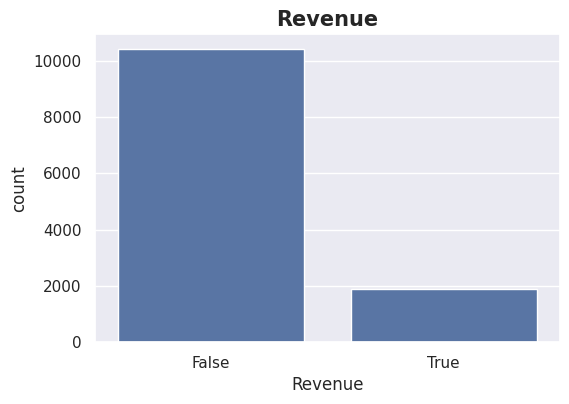

In [ ]:
sns.set_theme(style="darkgrid")
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Revenue')
plt.title('Revenue', fontsize=15, fontweight='bold')
plt.show()


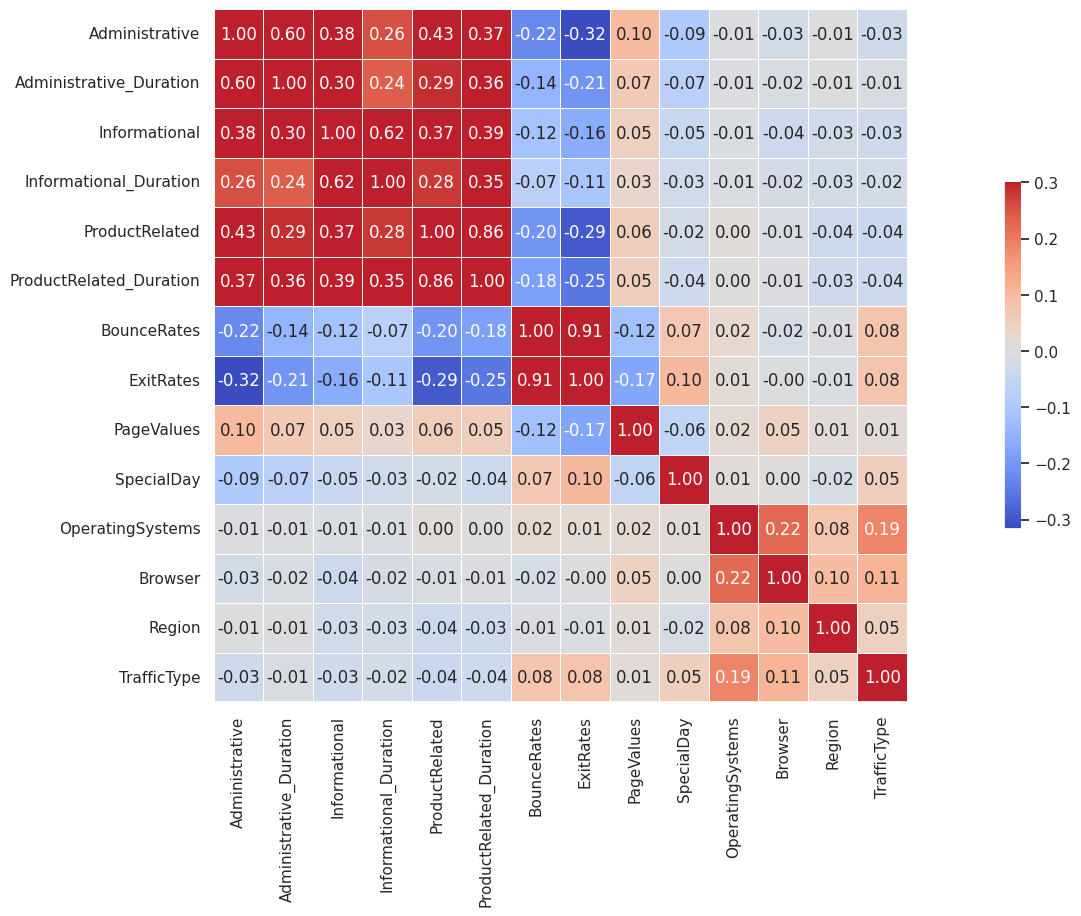

In [ ]:
# Select only numerical columns before calculating the correlation
numerical_df = df.select_dtypes(include=['number'])

corr = numerical_df.corr()
g = sns.heatmap(corr, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(25,9)
plt.show()

In [ ]:

# Create new features
df['TotalPageViews'] = df['PageValues'] * df['BounceRates']
df['AvgTimePerProduct'] = df['ProductRelated_Duration'] / df['ProductRelated']



In [ ]:
# Create a feature indicating whether the session was on a weekend
df['IsWeekend'] = df['Weekend'].apply(lambda x: 1 if x else 0)

# Create a feature representing the ratio of product related time to total time
df['ProductRelatedTimeRatio'] = df['ProductRelated_Duration'] / df['Administrative_Duration']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Assuming 'Revenue' is your target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
import numpy as np # Import numpy for handling infinite values

# Assuming 'df' is your DataFrame and 'Revenue' is the target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Split data into train and test sets BEFORE label encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['number']).columns

# Handle missing values in BOTH categorical and numerical columns
if categorical_cols.size > 0:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    X_train[categorical_cols] = imputer_cat.fit_transform(X_train[categorical_cols])
    X_test[categorical_cols] = imputer_cat.transform(X_test[categorical_cols])

if numerical_cols.size > 0:
    # Replace infinite values with NaNs before imputation
    X_train[numerical_cols] = X_train[numerical_cols].replace([np.inf, -np.inf], np.nan)
    X_test[numerical_cols] = X_test[numerical_cols].replace([np.inf, -np.inf], np.nan)

    imputer_num = SimpleImputer(strategy='mean')  # Or another strategy like 'median'
    X_train[numerical_cols] = imputer_num.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = imputer_num.transform(X_test[numerical_cols])

# Apply Label Encoding to categorical columns in TRAINING set ONLY IF there are any
if categorical_cols.size > 0:
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        label_encoders[col] = le

    # Transform categorical columns in TEST set
    for col in categorical_cols:
        X_test[col] = label_encoders[col].transform(X_test[col])

# Initialize models
logreg = LogisticRegression()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()

# Train models
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ... (Your existing code for data preprocessing and model training) ...

# Evaluate Models
models = [logreg, dtree, rf, svm]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC-AUC can only be calculated for probabilistic models
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = "N/A"

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc}")
    print("\n")

--- Logistic Regression ---
Accuracy: 0.8666
Precision: 0.7030
Recall: 0.3455
F1-score: 0.4633
ROC-AUC: 0.80199146346517


--- Decision Tree ---
Accuracy: 0.8483
Precision: 0.5473
Recall: 0.5207
F1-score: 0.5337
ROC-AUC: 0.7172749391727494


--- Random Forest ---
Accuracy: 0.8954
Precision: 0.7576
Recall: 0.5474
F1-score: 0.6356
ROC-AUC: 0.9193386257481307


--- SVM ---
Accuracy: 0.8350
Precision: 0.8333
Recall: 0.0122
F1-score: 0.0240
ROC-AUC: N/A




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
import numpy as np

# ... (Your existing code for data preprocessing) ...

# Define models and hyperparameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2']  # Note: l1 requires a solver that supports it
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    }
}

# Perform GridSearchCV for each model
for model_name, model_data in models.items():
    print(f"--- Tuning {model_name} ---")
    clf = GridSearchCV(model_data['model'], model_data['params'], cv=5, scoring='accuracy')  # Use appropriate scoring metric
    clf.fit(X_train, y_train)

    print(f"Best parameters: {clf.best_params_}")
    print(f"Best score: {clf.best_score_:.4f}\n")

    # Update the model with the best parameters
    models[model_name]['model'] = clf.best_estimator_

# ... (You can now use the updated models in 'models' for prediction and evaluation) ...

--- Tuning Logistic Regression ---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters: {'C': 1, 'penalty': 'l2'}
Best score: 0.8836

--- Tuning Decision Tree ---
Best parameters: {'max_depth': 5, 'min_samples_split': 2}
Best score: 0.8965

--- Tuning Random Forest ---
Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best score: 0.9059

--- Tuning SVM ---


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
import numpy as np

# ... (Your existing code for data preprocessing and hyperparameter tuning) ...

# Perform cross-validation for each model
for model_name, model_data in models.items():
    print(f"--- Cross-validation for {model_name} ---")
    model = model_data['model']
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # Use appropriate scoring metric

    print(f"Cross-validation scores: {scores}")
    print(f"Mean accuracy: {scores.mean():.4f}")
    print(f"Standard deviation: {scores.std():.4f}\n")

--- Cross-validation for Logistic Regression ---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [0.88494678 0.87987836 0.88798784 0.87987836 0.88539554]
Mean accuracy: 0.8836
Standard deviation: 0.0032

--- Cross-validation for Decision Tree ---
Cross-validation scores: [0.8935631  0.89204257 0.9006589  0.89559047 0.90060852]
Mean accuracy: 0.8965
Standard deviation: 0.0036

--- Cross-validation for Random Forest ---
Cross-validation scores: [0.89964521 0.89863153 0.91180943 0.89508363 0.90263692]
Mean accuracy: 0.9016
Standard deviation: 0.0057

--- Cross-validation for SVM ---
Cross-validation scores: [0.84896097 0.84946782 0.85149518 0.84794729 0.84939148]
Mean accuracy: 0.8495
Standard deviation: 0.0012

